## Import

In [14]:
import pandas as pd
import numpy as np
import ast
import pprint
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

In [8]:
events = pd.read_csv('/Users/liyuanxie/Desktop/DataAnalysis/SQL/athlete_events.csv')
noc = pd.read_csv('/Users/liyuanxie/Desktop/DataAnalysis/SQL/noc_regions.csv')

## Textual Analysis for TF-IDF

In [55]:
df = pysqldf("SELECT * FROM events;" )

In [56]:
country = df.groupby("Team")
country.describe()

ID                                                  \
                       count           mean           std      min       25%   
Team                                                                           
30. Februar              2.0   81025.000000  65561.526538  34666.0  57845.50   
A North American Team    4.0   57763.750000  49312.833349  33106.0  33106.75   
Acipactli                3.0   53466.333333  38075.214909  26276.0  31708.50   
Acturus                  2.0   56524.500000  53756.378826  18513.0  37518.75   
Afghanistan            126.0   70778.373016  44295.938693    502.0  30040.75   
...                      ...            ...           ...      ...       ...   
Zambia                 183.0   66261.830601  31306.868159   6435.0  39851.00   
Zefyros                  2.0  100440.500000  37515.550276  73913.0  87176.75   
Zimbabwe               309.0   66762.375405  37528.513714   5529.0  30256.00   
Zut                      3.0   77299.666667  44981.648150  51329.0  51329.50   
rn-2                     5.0   27759.400000  23033.889062   4244.0   4245.00   

                                                        Age             ...  \
                            50%        75%       max  count       mean  ...   
Team                                                                    ...   
30. Februar             81025.0  104204.50  127384.0    2.0  33.500000  ...   
A North American Team   33108.0   57765.00  131733.0    3.0  41.333333  ...   
Acipactli               37141.0   67061.50   96982.0    3.0  47.333333  ...   
Acturus                 56524.5   75530.25   94536.0    1.0  27.000000  ...   
Afghanistan             84983.0  109336.00  133719.0   78.0  23.538462  ...   
...                         ...        ...       ...    ...        ...  ...   
Zambia                  74243.0   83813.50  135416.0  154.0  23.461039  ...   
Zefyros                100440.5  113704.25  126968.0    2.0  35.500000  ...   
Zimbabwe                73499.0   91774.00  135497.0  307.0  25.166124  ...   
Zut                     51330.0   90285.00  129240.0    3.0  32.000000  ...   
rn-2                    33314.0   40579.00   56415.0    5.0  29.200000  ...   

                      Weight          Year                                  \
                         75%    max  count         mean        std     min   
Team                                                                         
30. Februar            70.00   70.0    2.0  1952.000000   0.000000  1952.0   
A North American Team    NaN    NaN    4.0  1900.000000   0.000000  1900.0   
Acipactli              78.50   84.0    3.0  1964.000000   0.000000  1964.0   
Acturus                  NaN    NaN    2.0  1948.000000   0.000000  1948.0   
Afghanistan            70.00  111.0  126.0  1966.031746  22.884733  1936.0   
...                      ...    ...    ...          ...        ...     ...   
Zambia                 75.00   95.0  183.0  1986.448087  13.507681  1964.0   
Zefyros                78.75   85.0    2.0  1960.000000   0.000000  1960.0   
Zimbabwe               75.00  106.0  309.0  1990.045307  16.277960  1928.0   
Zut                      NaN    NaN    3.0  1908.000000   0.000000  1908.0   
rn-2                   82.00   82.0    5.0  1912.000000   0.000000  1912.0   

                                                       
                          25%     50%     75%     max  
Team                                                   
30. Februar            1952.0  1952.0  1952.0  1952.0  
A North American Team  1900.0  1900.0  1900.0  1900.0  
Acipactli              1964.0  1964.0  1964.0  1964.0  
Acturus                1948.0  1948.0  1948.0  1948.0  
Afghanistan            1948.0  1960.0  1980.0  2016.0  
...                       ...     ...     ...     ...  
Zambia                 1980.0  1984.0  1992.0  2016.0  
Zefyros                1960.0  1960.0  1960.0  1960.0  
Zimbabwe               1980.0  1988.0  2000.0  2016.0  
Zut                    1908.0  19

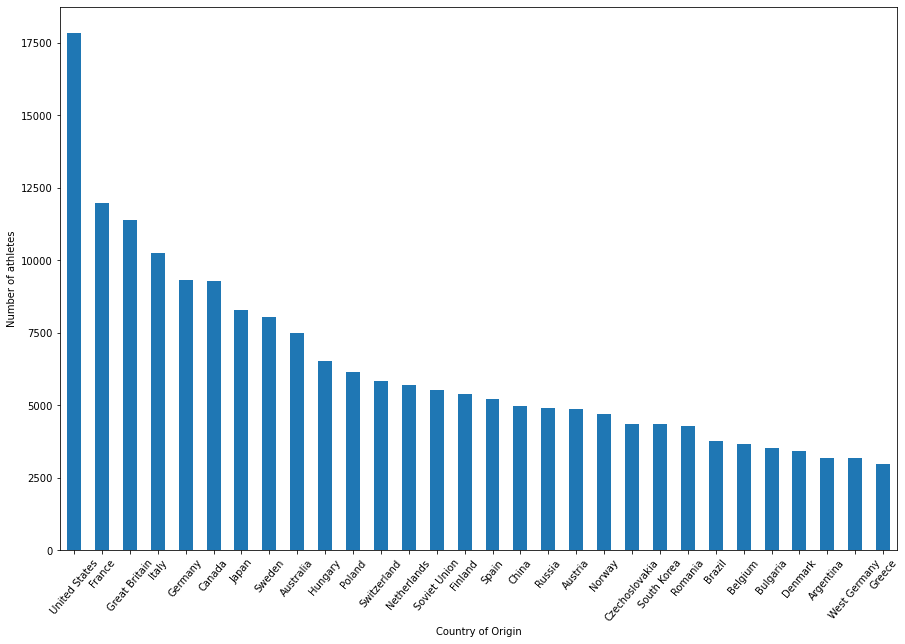

In [66]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False)[:30].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of athletes")
plt.show()

## Wordcloud

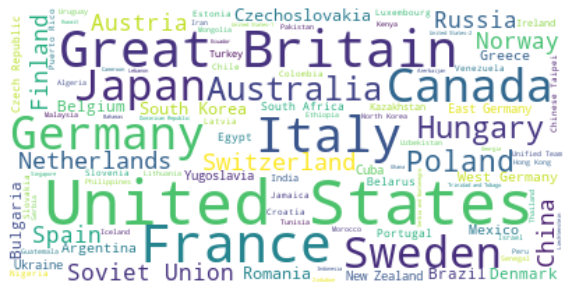

In [107]:
from collections import Counter

team = df.Team
WordDict = Counter(team)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(WordDict)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

United States is the country that participated the most games in the 120 year Olympic games.

Question for Milestone4: Is that the more the country participate, the more the medals they got?